### LGMVIP 

### TASK-3 PREDICTION USING DECISION TREE ALGORITHM

### NAME - ANJALI DUBEY

In [ ]:
#Create the Decision Tree classifier and visualize it graphically.
#The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\LGMVIP Internship\Iris.csv") 
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df = df.drop('Id', axis = 1) #Drop unnecessary columns
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
#DESCRIBING THE DATASET

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.shape

(150, 5)

In [11]:
df.size

750

In [12]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
# count of the column species
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### VISUALIZATION

<AxesSubplot:xlabel='count', ylabel='Species'>

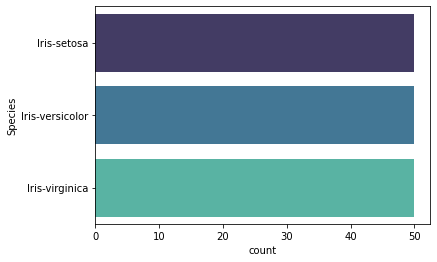

In [14]:
sns.countplot(y= df.Species, palette = "mako")

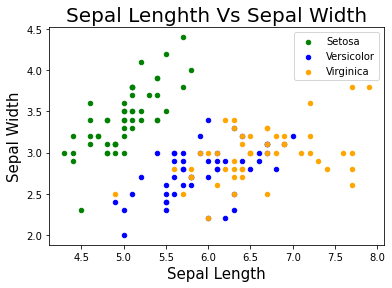

In [15]:
#Sepal length VS Sepal Width
fig = df[df.Species == 'Iris-setosa'].plot(kind = 'scatter', x= 'SepalLengthCm',y = 'SepalWidthCm',color = 'green', 
                                               label= 'Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind = 'scatter', x= 'SepalLengthCm', y = 'SepalWidthCm',color = 'blue',
                                             label= 'Versicolor',ax = fig)
df[df.Species == 'Iris-virginica'].plot(kind = 'scatter', x= 'SepalLengthCm',y = 'SepalWidthCm',color = 'orange', 
                                            label= 'Virginica',ax = fig)
fig.set_xlabel("Sepal Length", fontsize =15)
fig.set_ylabel("Sepal Width", fontsize = 15)
fig.set_title("Sepal Lenghth Vs Sepal Width", fontsize= 20)
plt.show()

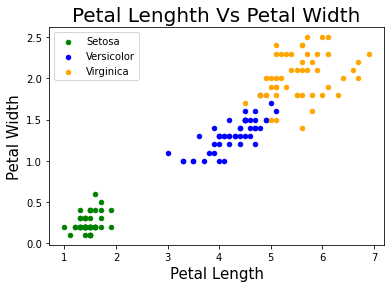

In [16]:
#Petal length VS Petal Width
fig = df[df.Species == 'Iris-setosa'].plot.scatter(x= 'PetalLengthCm',y = 'PetalWidthCm', color = 'green', label= 'Setosa')
df[df.Species == 'Iris-versicolor'].plot.scatter(x= 'PetalLengthCm', y = 'PetalWidthCm', color = 'blue',
                                                     label= 'Versicolor',ax = fig)
df[df.Species == 'Iris-virginica'].plot.scatter(x= 'PetalLengthCm',y = 'PetalWidthCm', color = 'orange', 
                                                    label= 'Virginica',ax = fig)
fig.set_xlabel("Petal Length", fontsize = 15)
fig.set_ylabel("Petal Width", fontsize = 15)
fig.set_title("Petal Lenghth Vs Petal Width", fontsize = 20)
plt.show()

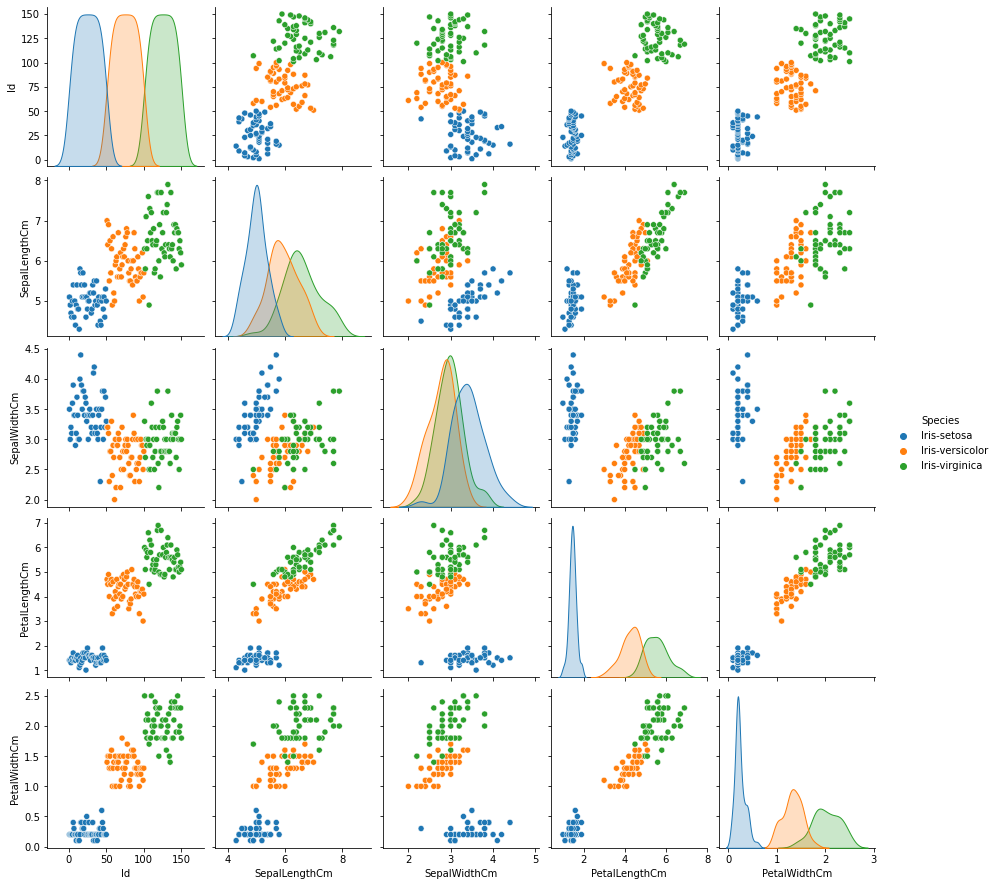

In [17]:
# pairplot for better visualization
sns.pairplot(iris, hue = 'Species')

##### Data Preprocessing (Correlation Matrix) To convert Categorical variable

In [18]:
# checking the correlation matrix of the categorical variables
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


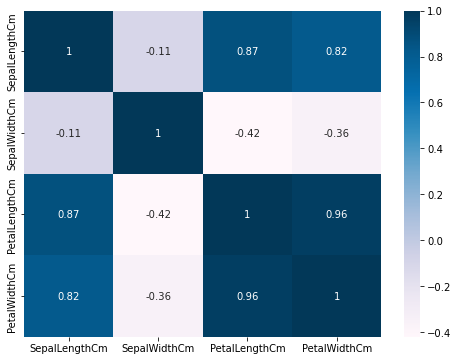

In [19]:
# plotting the correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot = True, cmap = 'PuBu')
plt.show()

In [20]:
# sklearn library
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [21]:
LE = LabelEncoder()

In [22]:
df.iloc[:,-1] =  LE.fit_transform(df.iloc[:,-1])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##### Splitting the data into independent and dependent data

In [23]:
x = df.iloc[:,:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

##### Splitting the data set into train and test split

In [27]:
# to split the data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 50)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4


In [28]:
#shape of X_train and X_test
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [29]:
#shape of y_train and y_test
print(y_train.shape, y_test.shape)

(120,) (30,)


##### Model Builiding for decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [31]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

##### Comparison Between Actual and Predicted output

In [32]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [33]:
y_test = np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [34]:
final_pred = pd.DataFrame( { 'Actual':  y_test,
                            'Predicted': dt.predict( X_test) } )

In [35]:
final_pred.sample(n = 10)

,Actual,Predicted
15,0,0
14,1,1
18,1,1
25,2,2
8,0,0
23,2,2
11,2,2
20,2,2
29,2,2
7,0,0


In [36]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [37]:
metrics.accuracy_score( final_pred.Actual, final_pred.Predicted )

0.9666666666666667

##### Accuracy of Decision Tree Model

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_pred, y_test)

0.9666666666666667

##### Confusion Matrics for Decision Tree Model

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]], dtype=int64)

##### Classification Report of Decision Tree Model

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



##### Decision Tree Visualization

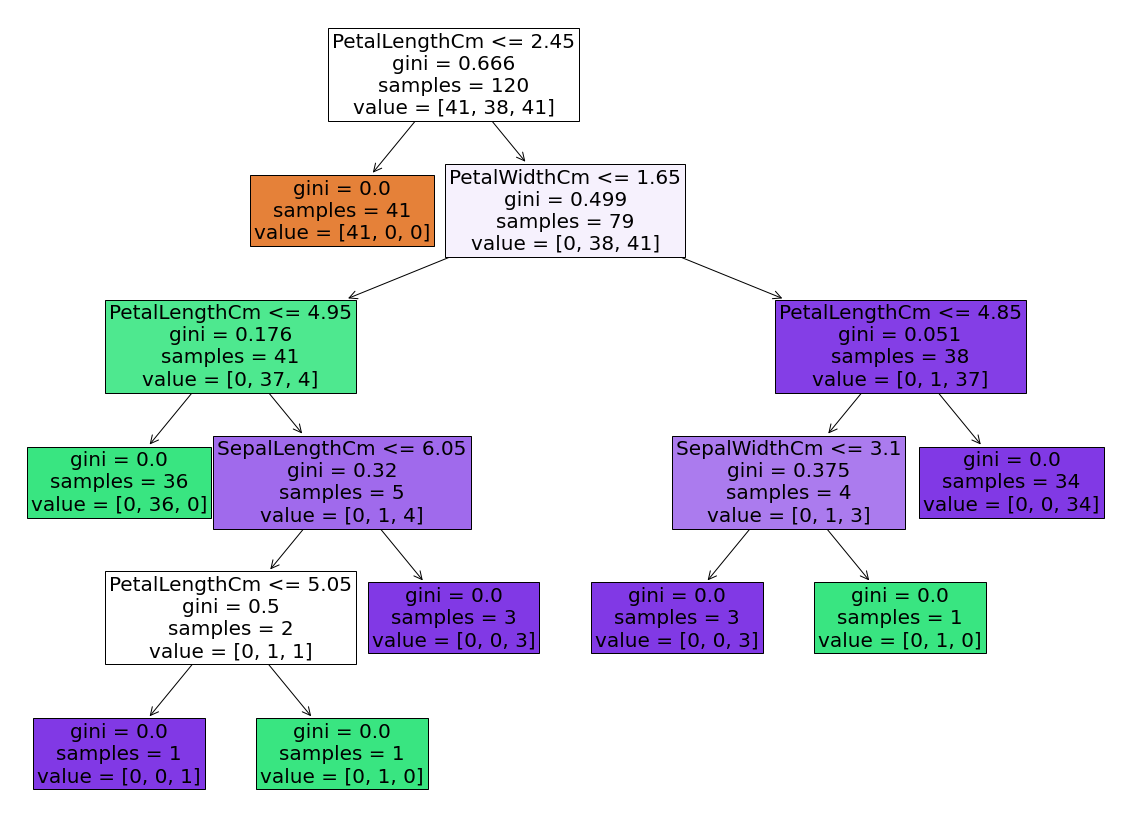

In [44]:
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize = (20,15))
tviz = tree.plot_tree(dt, feature_names = x.columns, filled = True,fontsize = 20)

##### The Descision Tree Classifier is created and is visaulized graphically. Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated.

### THANK YOU